In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Iris.csv to Iris.csv


In [ ]:
df=pd.read_csv('Iris.csv')

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop(['Id','Species'],axis=1)
y=df['Species']


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x=df.drop(['Id','Species'],axis=1)
y=df['Species']

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
y_pred = lr.predict(x_test)
y_pred_proba = lr.predict_proba(x_test)
accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
roc_auc_score(y_test,y_pred_proba, multi_class='ovr')
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy        

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)


DecisionTreeClassifier()

[Text(0.3076923076923077, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.2692307692307693, 0.8571428571428572, 'True  '),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.34615384615384615, 0.8571428571428572, '  False'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 

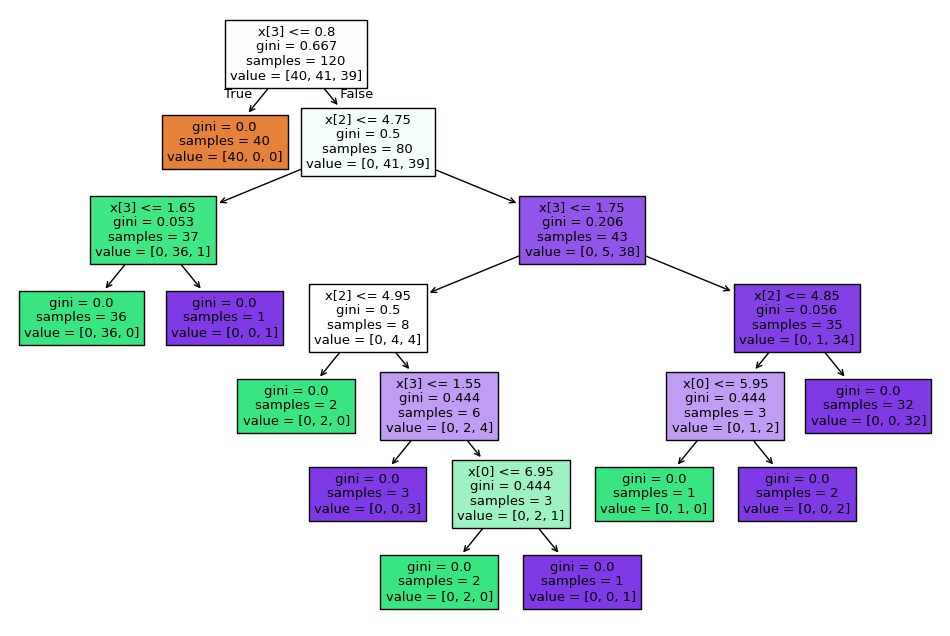

In [ ]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(dt,filled=True)

In [ ]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
km.fit(x)

KMeans(n_clusters=3)

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

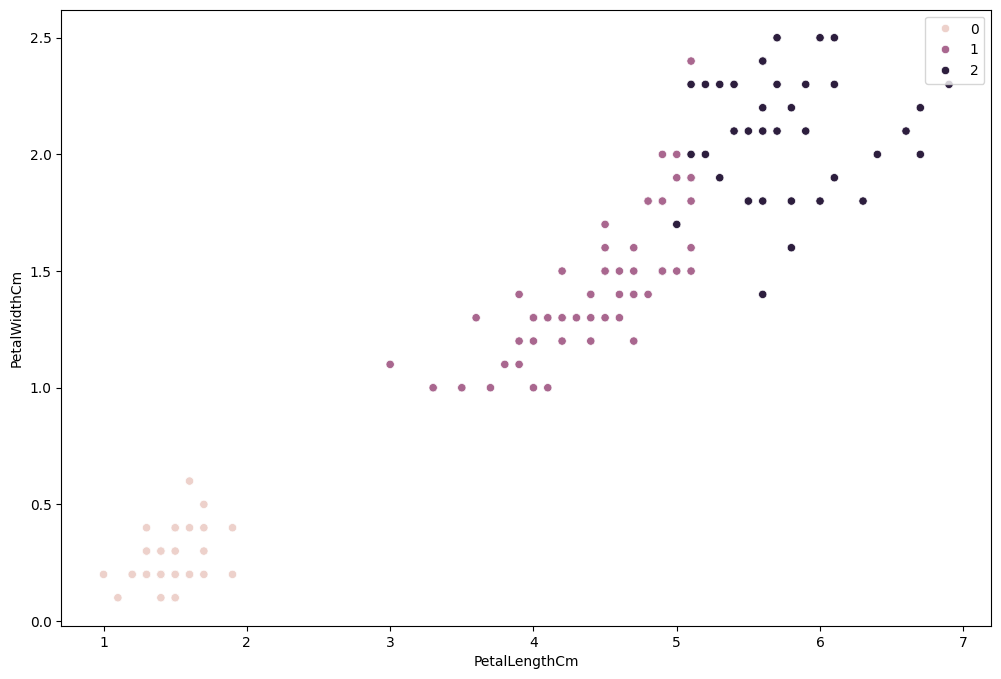

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=x['PetalLengthCm'],y=x['PetalWidthCm'],hue=km.labels_)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
ac=AgglomerativeClustering(n_clusters=3)
ac.fit(x)


AgglomerativeClustering(n_clusters=3)

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

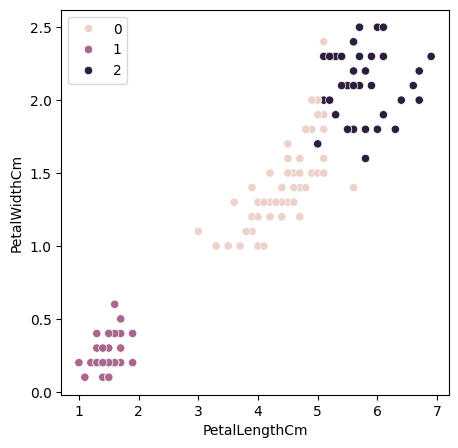

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=x['PetalLengthCm'],y=x['PetalWidthCm'],hue=ac.labels_)

<Axes: xlabel='PetalLengthCm', ylabel='Count'>

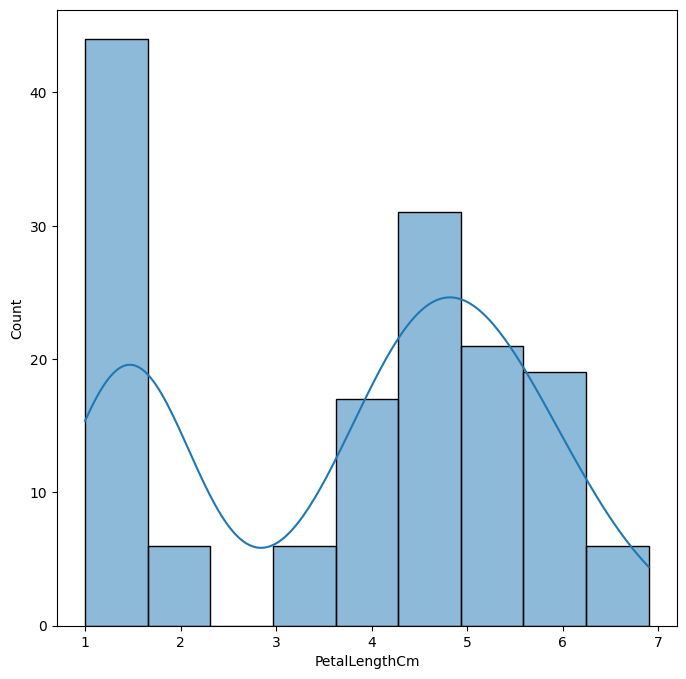

In [ ]:
plt.figure(figsize=(8,8))
sns.histplot(x=df['PetalLengthCm'],kde=True)

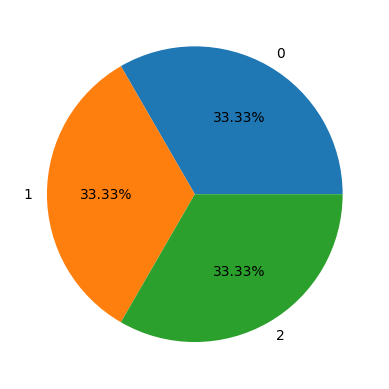

In [ ]:
plt.pie(df['Species'].value_counts(),labels=df['Species'].value_counts().index,autopct='%1.2f%%')
plt.show()

In [ ]:
!pip install catboost
import catboost as cb
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score

cb_model=cb.CatBoostClassifier()
cb_model.fit(x_train,y_train)
y_pred=cb_model.predict(x_test)
y_pred_proba=cb_model.predict_proba(x_test)
accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
roc_auc_score(y_test,y_pred_proba, multi_class='ovr')
print(classification_report(y_test,y_pred))

# Corrected way to plot the tree
plt.figure(figsize=(12,8))
cb_model.plot_tree(tree_idx=0)
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.9 MB/s eta 0:00:00
Learning rate set to 0.071017
0:	learn: 1.0144505	total: 47.1ms	remaining: 47s
1:	learn: 0.9426321	total: 47.5ms	remaining: 23.7s
2:	learn: 0.8791473	total: 48ms	remaining: 16s
3:	learn: 0.8214933	total: 48.5ms	remaining: 12.1s
4:	learn: 0.7788401	total: 48.9ms	remaining: 9.74s
5:	learn: 0.7280627	total: 49.4ms	remaining: 8.18s
6:	learn: 0.6913500	total: 49.8ms	remaining: 7.06s
7:	learn: 0.6584766	total: 50.2ms	remaining: 6.23s
8:	learn: 0.6235636	total: 50.5ms	remaining: 5.56s
9:	learn: 0.5948198	total: 50.9ms	remaining: 5.04s
10:	learn: 0.5645192	total: 51.3ms	remaining: 4.61s
11:	learn: 0.5372072	total: 51.8ms	remaining: 4.26s
12:	learn: 0.5124436	total: 52.2ms	remaining: 3.96s
13:	learn: 0.4845248	total: 52.4ms	remaining: 3.69s
14:	learn: 0.4639622	total: 52.8ms	remaining: 3.47s
15:	learn: 0.4432597	total: 53.2ms	remaining: 3.27s
16:	learn: 0.4251080	total: 53.7ms	remaining: 3.1s
17:	learn: 0.4095535	tota

<Figure size 1200x800 with 0 Axes>

In [ ]:
%matplotlib inline
cb_model.plot_tree(tree_idx=0)
plt.show()

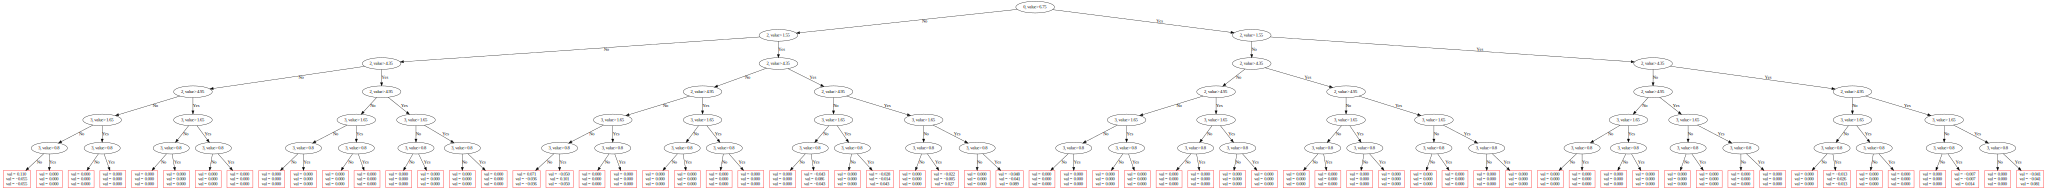

In [ ]:
from IPython.display import display
tree_viz = cb_model.plot_tree(tree_idx=0)
display(tree_viz)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy        

<Figure size 1200x800 with 0 Axes>

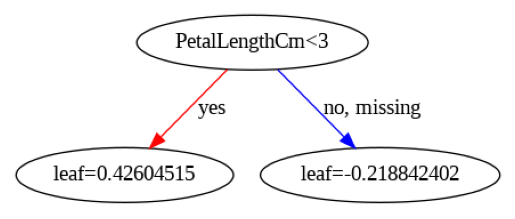

In [ ]:
!pip install XGBoost
import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
xgb_model=xgb.XGBClassifier()
xgb_model.fit(x_train,y_train)
y_pred=xgb_model.predict(x_test)
y_pred_proba=xgb_model.predict_proba(x_test)
accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
roc_auc_score(y_test,y_pred_proba, multi_class='ovr')
print(classification_report(y_test,y_pred))

plt.figure(figsize=(12,8))
xgb.plot_tree(xgb_model,tree_idx=0)
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 91
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.073920
[LightGBM] [Info] Start training from score -1.123930
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

<Figure size 1200x800 with 0 Axes>

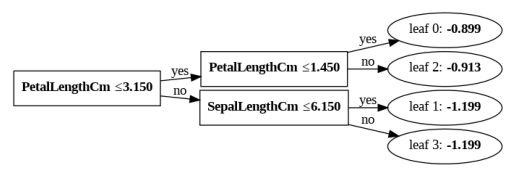

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
lgb_model=lgb.LGBMClassifier()
lgb_model.fit(x_train,y_train)
y_pred=lgb_model.predict(x_test)
y_pred_proba=lgb_model.predict_proba(x_test)
accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
roc_auc_score(y_test,y_pred_proba, multi_class='ovr')
print(classification_report(y_test,y_pred))

plt.figure(figsize=(12,8))
lgb.plot_tree(lgb_model,tree_index=0)
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy        

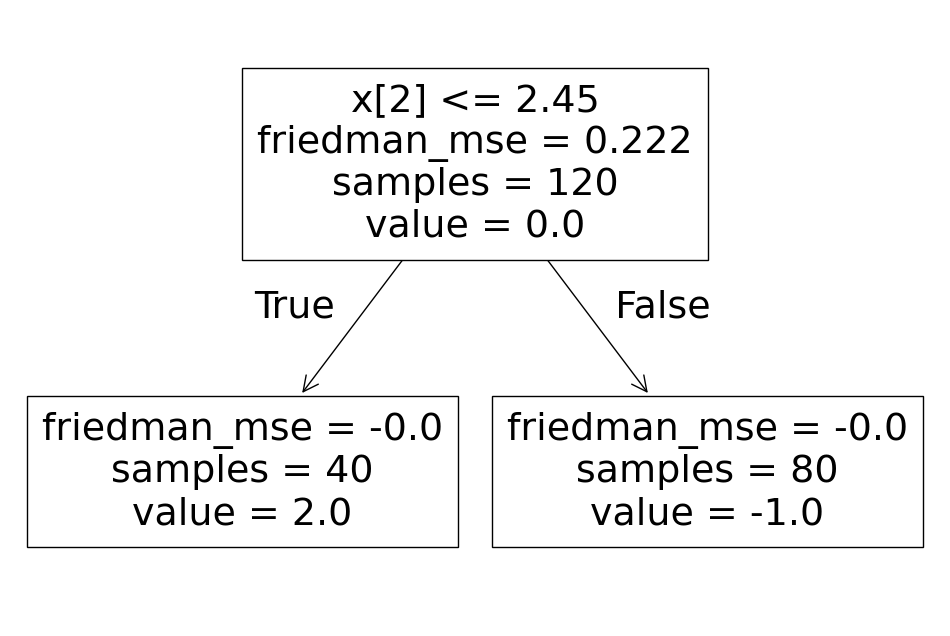

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import plot_tree

SEED = 42

gb_model = GradientBoostingClassifier(random_state=SEED)
gb_model.fit(x_train, y_train)
y_pred = gb_model.predict(x_test)
y_pred_proba = gb_model.predict_proba(x_test)
accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
roc_auc_score(y_test,y_pred_proba, multi_class='ovr')
print(classification_report(y_test,y_pred))

plt.figure(figsize=(12,8))
plot_tree(gb_model.estimators_[0, 0])
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)
y_pred_proba=rf_model.predict_proba(x_test)
accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
roc_auc_score(y_test,y_pred_proba, multi_class='ovr')
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy        

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
from sklearn.ensemble import AdaBoostClassifier

ad_model=AdaBoostClassifier()
ad_model.fit(x_train,y_train)
y_pred=ad_model.predict(x_test)
y_pred_proba=ad_model.predict_proba(x_test)
accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
roc_auc_score(y_test,y_pred_proba, multi_class='ovr')
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      0.89      0.89         9
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      0.89      0.89         9
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      0.89      0.89         9
           2       0.91      0.91      0.91        11

    accuracy        

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()
nb_model.fit(x_train,y_train)
y_pred=nb_model.predict(x_test)
y_pred_proba=nb_model.predict_proba(x_test)
accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
roc_auc_score(y_test,y_pred_proba, multi_class='ovr')
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy        